In [53]:
import pandas as pd
import networkx as nx
import datetime
import matplotlib.pyplot as plt

In [54]:
df = pd.read_csv('fourCollections.csv', dtype={'collection_slug': 'str', 'asset_id': 'int', 'asset_name': 'str', 'owner_username': 'str', 'owner_address': 'str', 'event_type': 'str'})

In [55]:
# Clean Data
df.drop('Unnamed: 0.1', axis=1, inplace=True)
df.drop('Unnamed: 0', axis=1, inplace=True)
df.drop('collection_slug', axis=1,inplace=True)
df.drop('asset_contract_date', axis=1, inplace=True)
pd.to_datetime(df['event_timestamp']).dt.strftime('%m/%d/%Y %H:%M')
df.drop_duplicates(keep='first')
df = df[df['event_type'] == 'successful']


In [56]:
# Sort Data
df = df[(df['event_timestamp'] > '2021-12-10T10:00') & (df['event_timestamp'] < '2021-12-10T17:00')]
df

,collection_name,asset_id,asset_name,owner_username,owner_address,event_timestamp,event_type
696216,Bored Ape Yacht Club,23138819,NaN,Bao_Weave,0x2ccb1cb25695af8f4ff38352c2696a0af8297d01,2021-12-10T16:02:26,successful
696217,Bored Ape Yacht Club,23142200,NaN,NaN,0x3d1b7ec0395e1438b2a8491f32af400e63640c0f,2021-12-10T14:19:42,successful
696218,Bored Ape Yacht Club,23136428,NaN,NaN,0xc0b99f0578afd9adb818eaeadcbf02b392852fdd,2021-12-10T12:56:57,successful
696219,Bored Ape Yacht Club,23133869,NaN,Raturi29,0x822a16309a9ee40f15e196898f11a010ecb1c963,2021-12-10T11:02:10,successful
1161327,mfers,125200748,mfer #5431,NaN,0xf9c7f88e12d710a949f89fe878a667d949d0547e,2021-12-10T16:56:11,successful
1161328,mfers,125199470,mfer #4761,NaN,0x1ab9a94b8b7966165a0b8405f86bb83e28e01ca9,2021-12-10T16:34:02,successful
1161329,mfers,125193583,mfer #1413,DRENGR-NFT,0x1d65b96d931c1612d16d155af0037e61b6b2e662,2021-12-10T16:26:15,successful
1161330,mfers,125195054,mfer #2115,HoodedMfer,0x74e7bdf51a338adb142627d16fa9473e9a81870a,2021-12-10T15:47:22,successful
1161331,mfers,125206920,mfer #8362,middlemarch,0xc2172a6315c1d7f6855768f843c420ebb36eda97,2021-12-10T14:13:22,successful
1161332,mfers,125199178,mfer #4466,Jaeodor,0x377b59225ef9a706d196b936d6d8b682d24d0cef,2021-12-10T13:20:57,successful


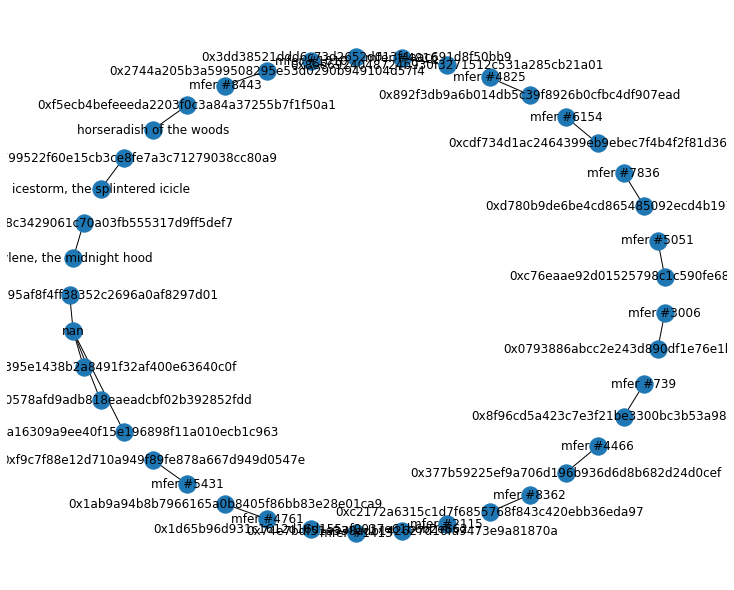

In [57]:
plt.figure(figsize=(10, 8))
G = nx.from_pandas_edgelist(df, 'owner_address', 'asset_name')

nx.draw_shell(G, with_labels=True)